<a href="https://colab.research.google.com/github/rayxuan2000/Project/blob/main/Time_Series_Forecasting_with_Yahoo_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Data

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/file/d/1HM_BGOSn_zlE5BEoa3yonSIqyFqdwu71/view?usp=sharing

id="1HM_BGOSn_zlE5BEoa3yonSIqyFqdwu71"
file = drive.CreateFile({'id':id})
print(file)
file.GetContentFile('yahoo_stock.csv')
pd.set_option('display.max_columns', None)
df = pd.read_csv('yahoo_stock.csv', low_memory=False)

GoogleDriveFile({'id': '1HM_BGOSn_zlE5BEoa3yonSIqyFqdwu71'})


# 2. EDA

## Genaral analysis:

In [ ]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


## Visualization:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Adj Close')

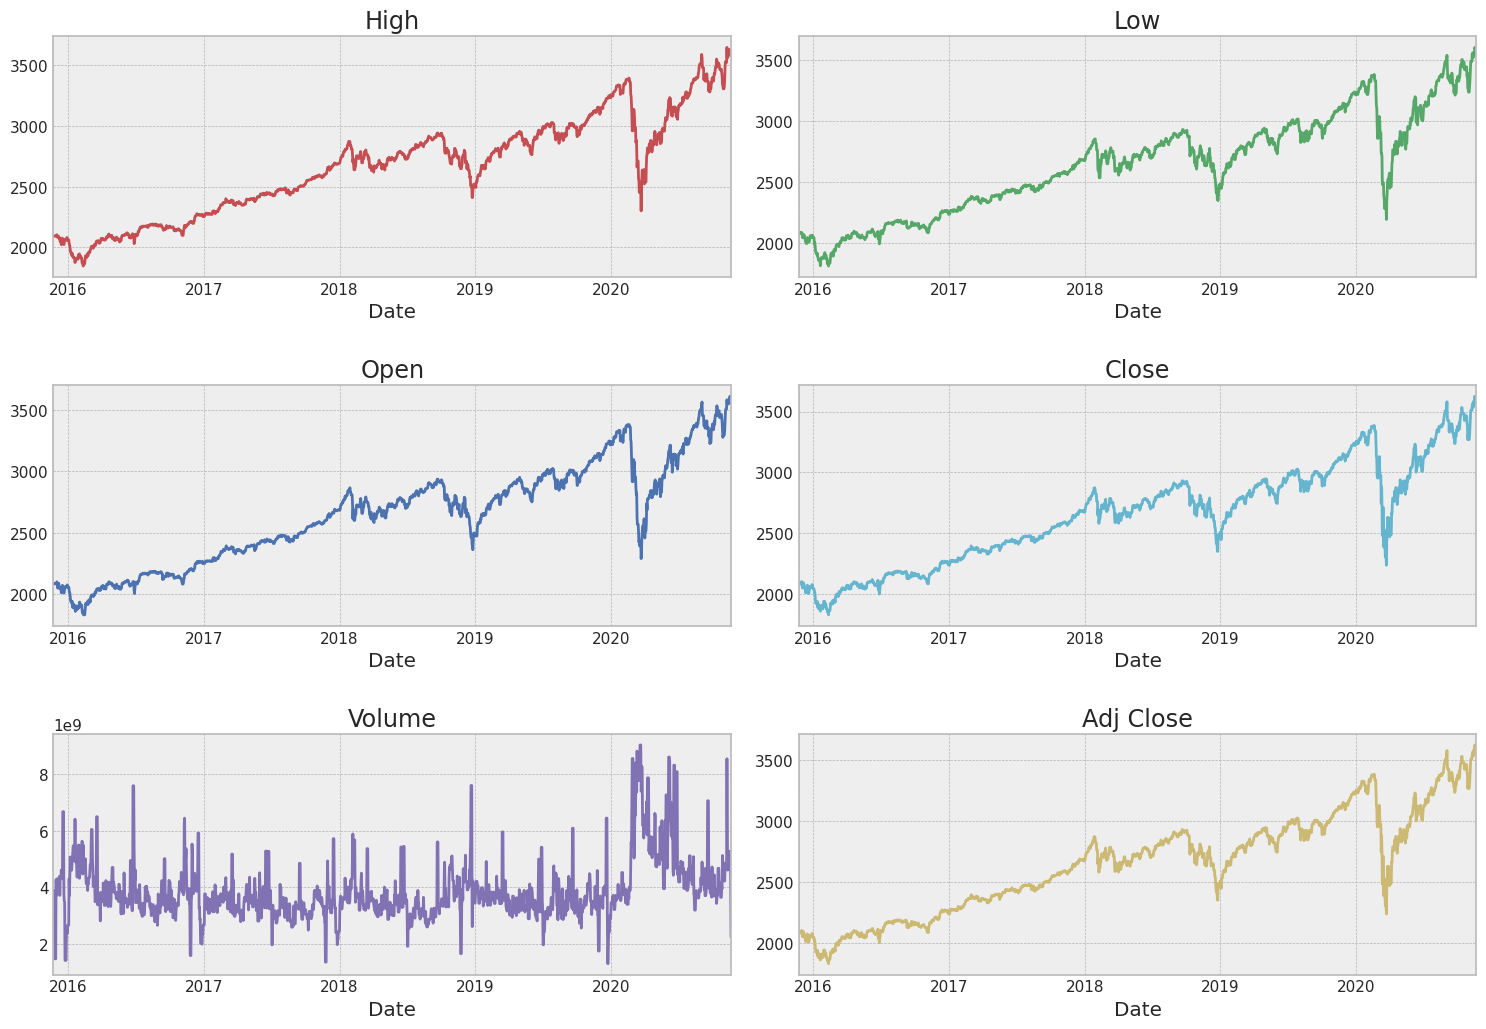

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=0.1, hspace=0.45)
df['High'].plot(ax=axes[0,0],color='r'); axes[0,0].set_title('High')
df['Low'].plot(ax=axes[0,1],color='g'); axes[0,1].set_title('Low')
df['Open'].plot(ax=axes[1,0],color='b'); axes[1,0].set_title('Open')
df['Close'].plot(ax=axes[1,1],color='c'); axes[1,1].set_title('Close')
df['Volume'].plot(ax=axes[2,0],color='m'); axes[2,0].set_title('Volume')
df['Adj Close'].plot(ax=axes[2,1],color='y'); axes[2,1].set_title('Adj Close')

## Correlation:

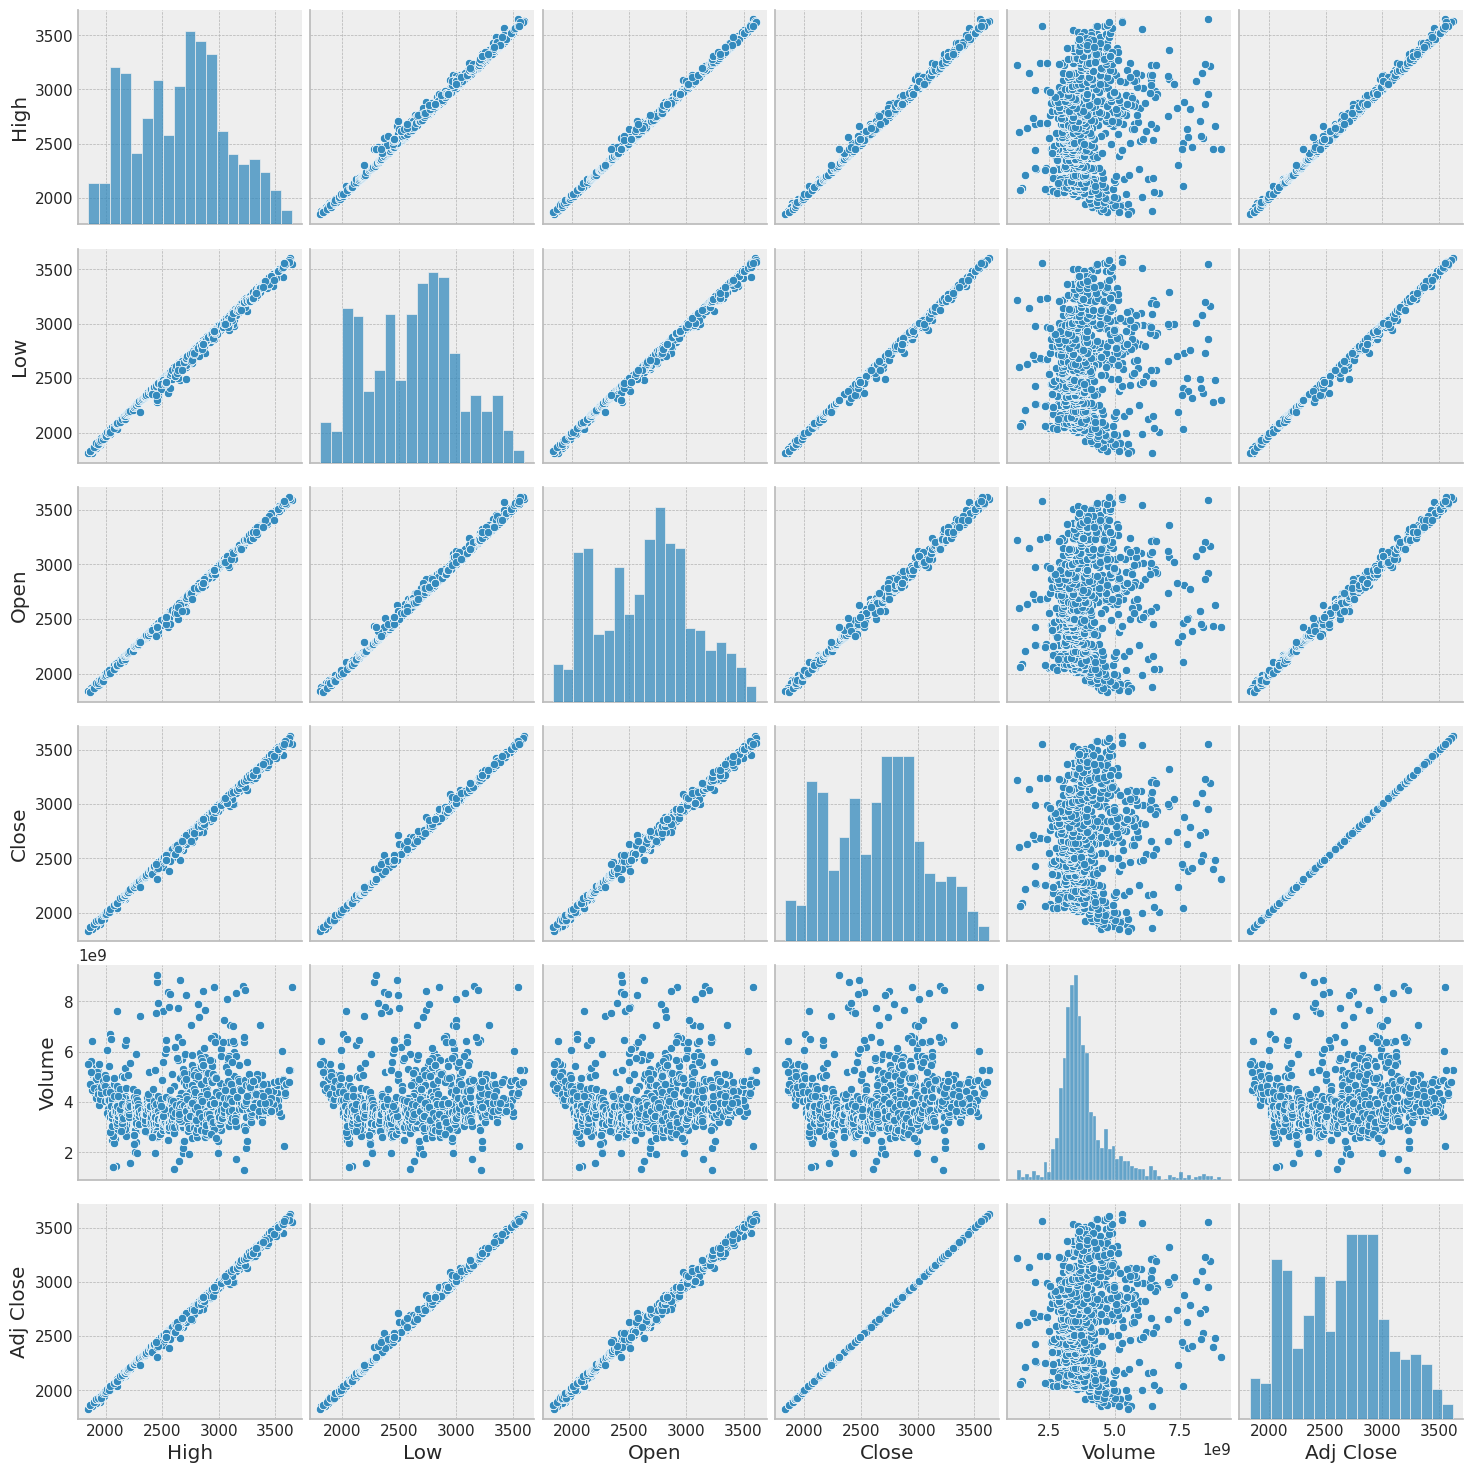

In [ ]:
import seaborn as sns
sns.pairplot(data=df)

[Text(0.5, 0, 'High'),
 Text(1.5, 0, 'Low'),
 Text(2.5, 0, 'Open'),
 Text(3.5, 0, 'Close')]

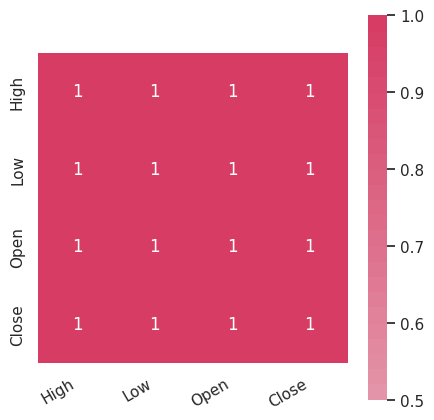

In [ ]:
corr=df[['High','Low','Open','Close']].corr()
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.heatmap(
    corr,
    vmin=0.5, vmax=1, center=0,
    cmap=sns.diverging_palette(2, 2, n=100),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right')

The relation between 'High', 'Low', 'Open' and 'Close' is strong, which can also be inferred from the time series plot.

## Analysis of varying rate:

In [ ]:
df['div'] = df['High'].div(df['High'].shift())
df['pct'] = df['div'].sub(1).mul(100)
# df.fillna(0,inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,div,pct
Date,,,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN,NaN
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,0.999289,-0.071101
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,0.999465,-0.053489
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,1.000000,0.000000
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,1.000139,0.013858


Text(0.5, 1.0, 'Percentage Change')

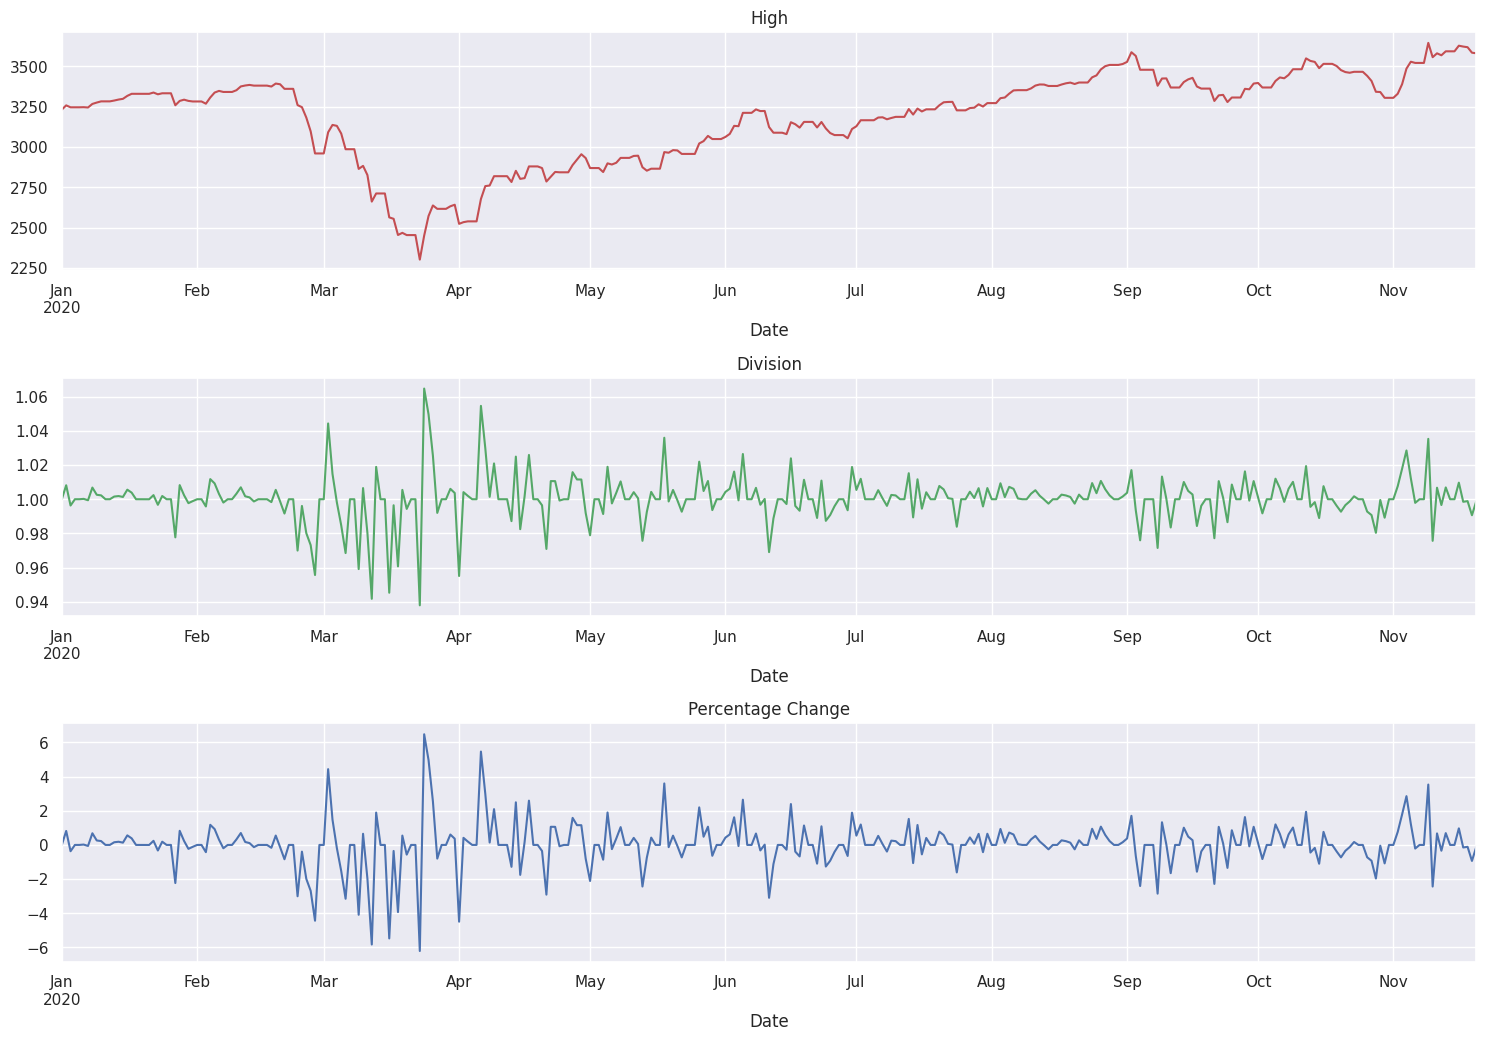

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.45)
df['High'].iloc[1500:].plot(ax=axes[0],color='r'); axes[0].set_title('High')
df['div'].iloc[1500:].plot(ax=axes[1],color='g'); axes[1].set_title('Division')
df['pct'].iloc[1500:].plot(ax=axes[2],color='b'); axes[2].set_title('Percentage Change')

## Statistic analysis:

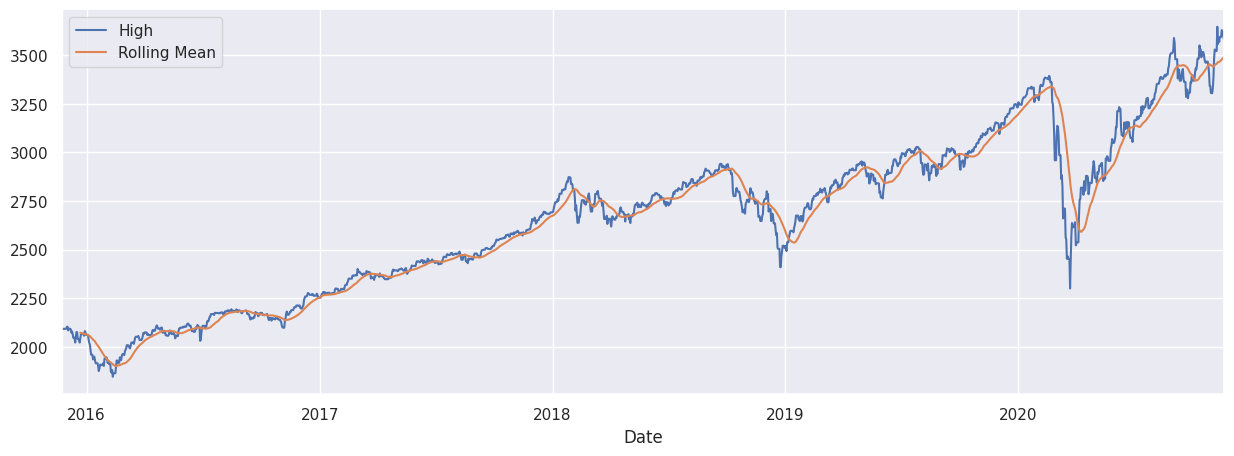

In [ ]:
plt.figure(figsize=(15,5))
rolling = df['High'].rolling(30).mean()
df['High'].plot()
rolling.plot()
plt.legend(['High','Rolling Mean'])

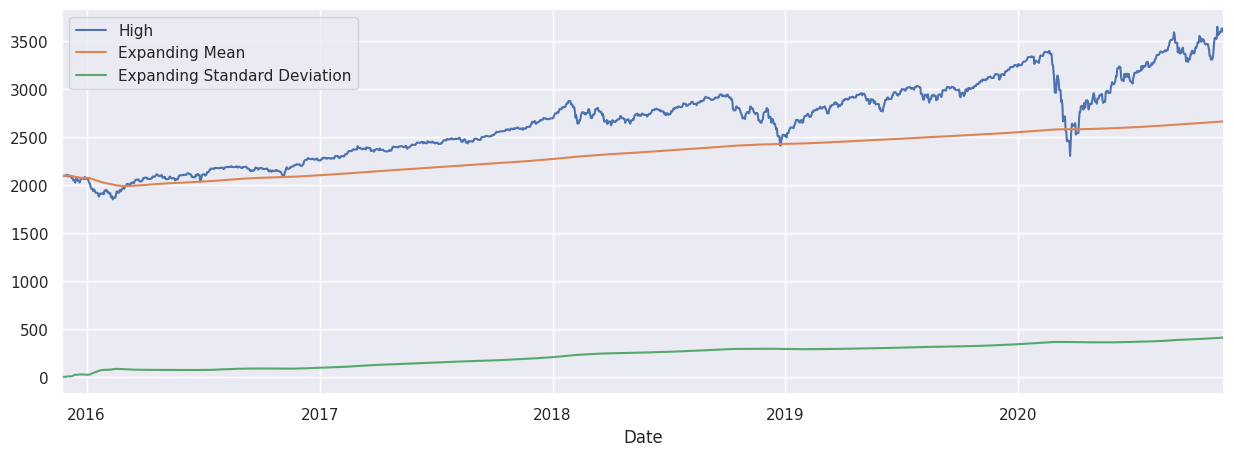

In [ ]:
yahoo_mean = df.High.expanding().mean()
yahoo_std = df.High.expanding().std()
plt.figure(figsize=(15,5))
df.High.plot()
yahoo_mean.plot()
yahoo_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])

## Resampling:

In [ ]:
df_clean=df[['High']]
df_clean.head(10)

,High
Date,
2015-11-23,2095.610107
2015-11-24,2094.120117
2015-11-25,2093.000000
2015-11-26,2093.000000
2015-11-27,2093.290039
2015-11-28,2093.290039
2015-11-29,2093.290039
2015-11-30,2093.810059
2015-12-01,2103.370117


<Axes: xlabel='Date'>

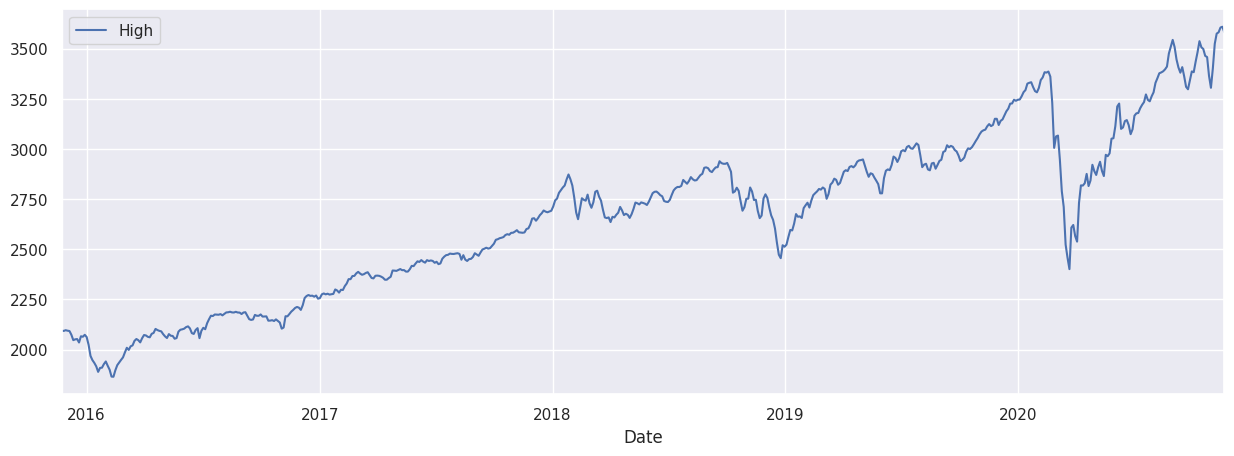

In [ ]:
y = df_clean.resample('3D').mean()
y.plot(figsize=(15, 5))

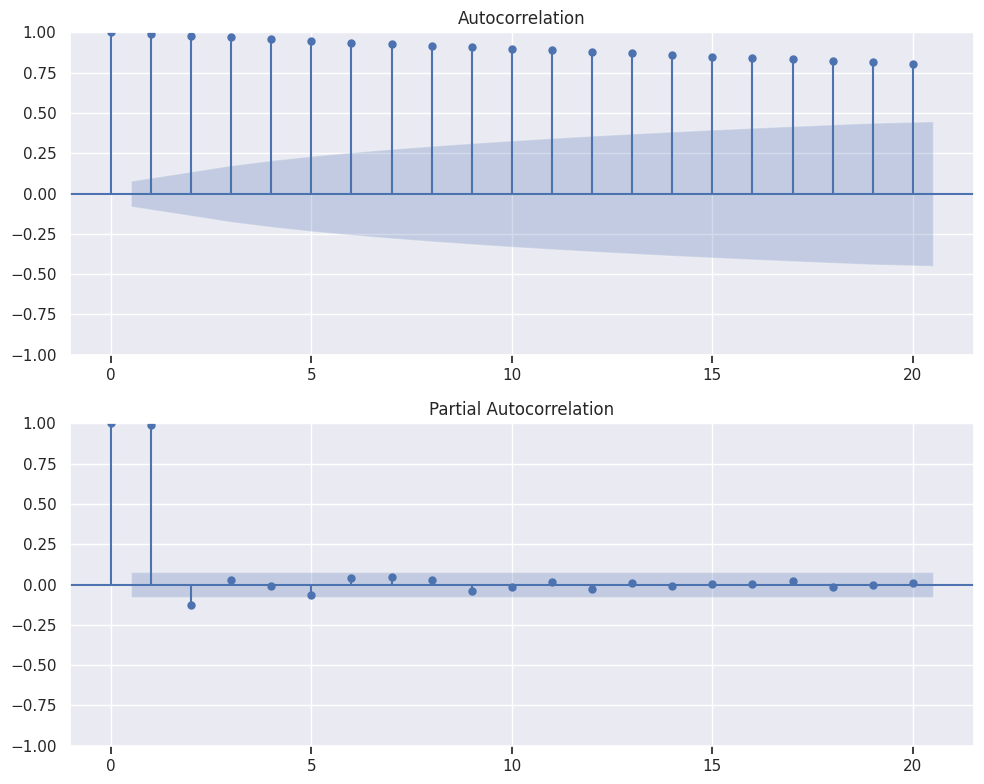

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

# 3. Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    # result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq',period=120)
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq',period=180)

    plt.rcParams.update({'figure.figsize': (10,8)})
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot()
    # suptitle('Additive Decompose', fontsize=10)

    plt.show()

    return result_add

<Figure size 1000x800 with 0 Axes>

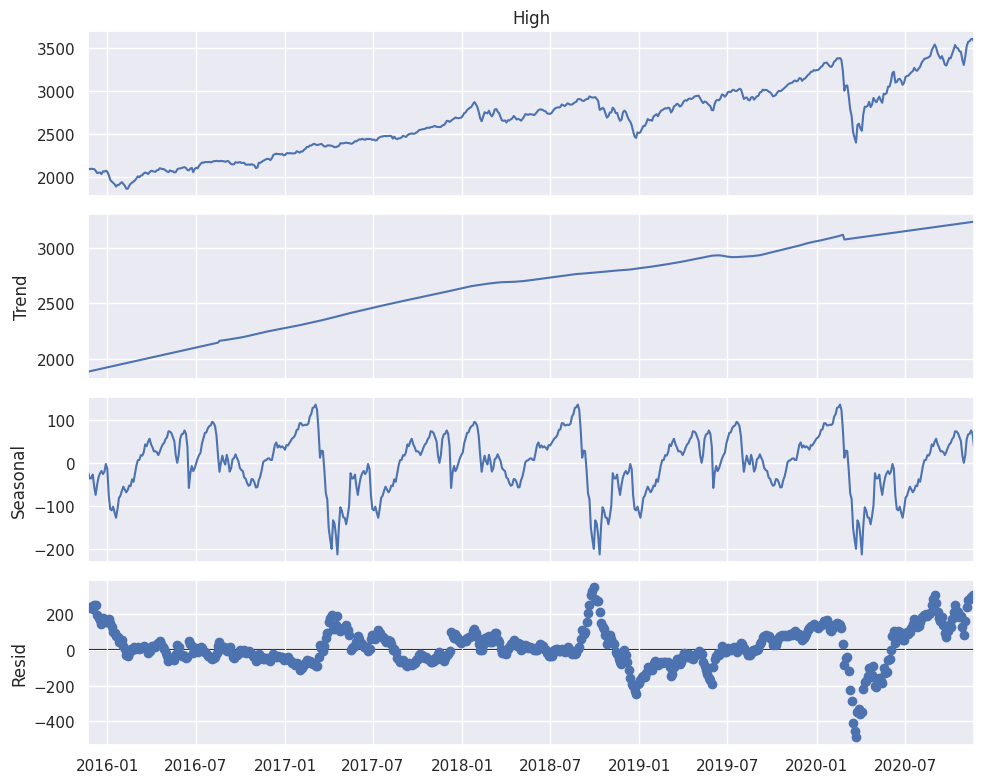

In [ ]:
result_add = decompose(y, 'High')

## ADF Validation

In [ ]:
from statsmodels.tsa.stattools import adfuller
ADFresult = adfuller(result_add.observed)
print('ADF Statistic: %f' % ADFresult[0])
print('p-value: %f' % ADFresult[1])
print('Critical Values:')
for key, value in ADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.848231
p-value: 0.804543
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [ ]:
ADFresult = adfuller(result_add.seasonal)
print('ADF Statistic: %f' % ADFresult[0])
print('p-value: %f' % ADFresult[1])
print('Critical Values:')
for key, value in ADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.484397
p-value: 0.000210
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


# 4. ARIMA Model

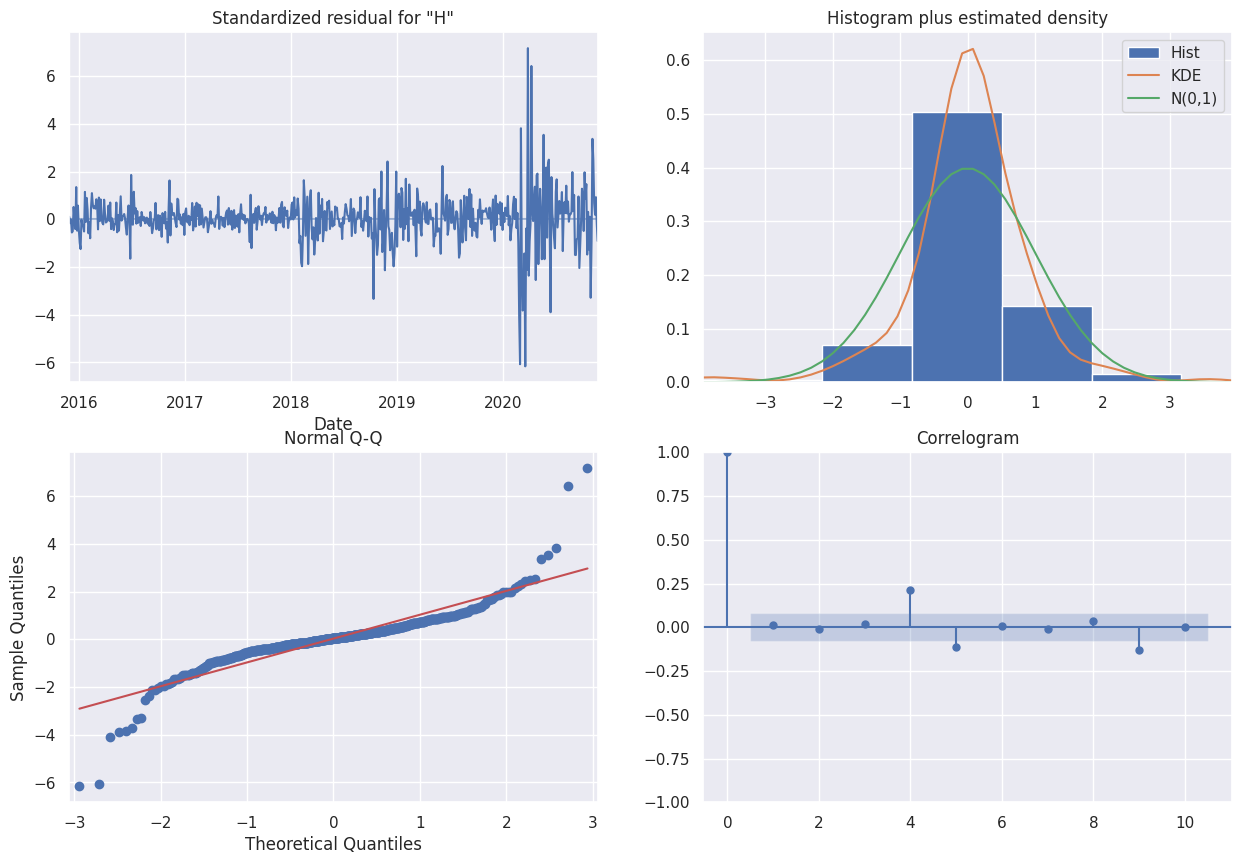

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y, order=(2, 2, 1))
Yahoo_results = mod.fit()
Yahoo_results.plot_diagnostics(figsize=(15, 10))
plt.show()

## In-sample Prediction

<Figure size 2000x1000 with 0 Axes>

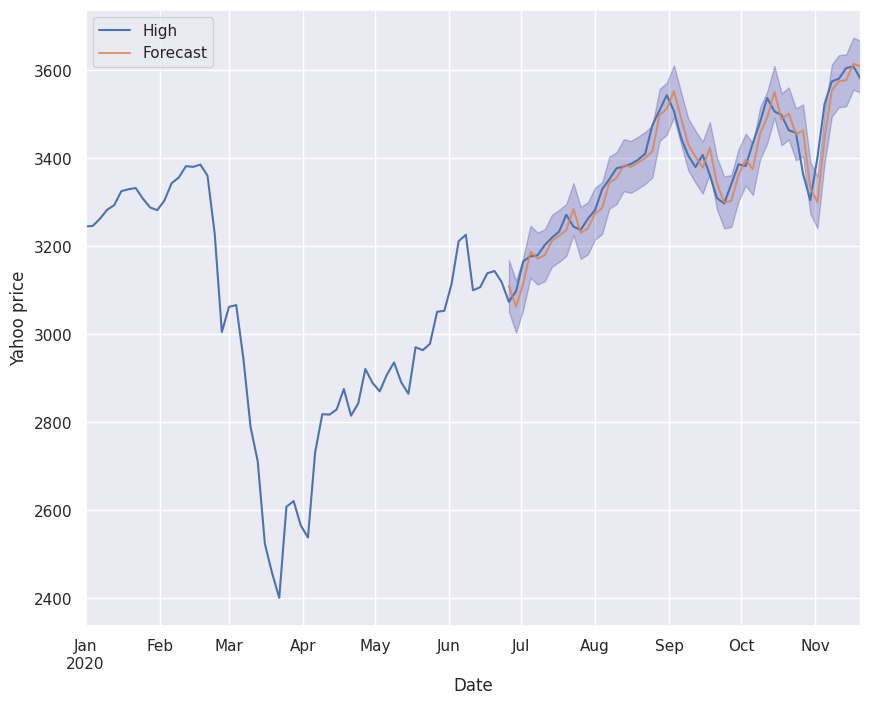

In [ ]:
pred = Yahoo_results.get_prediction(start=pd.to_datetime('2020-06-26'), dynamic=False)
pred_ci = pred.conf_int()
# Construct confidence interval for the fitted parameters.

plt.figure(figsize=(20,10))
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.8)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='darkblue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Yahoo price')
plt.legend()

plt.show()

In [ ]:
pred_ci.head()

,lower High,upper High
Date,,
2020-06-26,3051.229552,3169.353966
2020-06-29,3003.982627,3122.106852
2020-07-02,3056.275304,3174.399340
2020-07-05,3128.762486,3246.886335
2020-07-08,3113.271789,3231.395451


In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y.loc['2020-06-26':,'High']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1365.23


## Out-of-sample Prediction

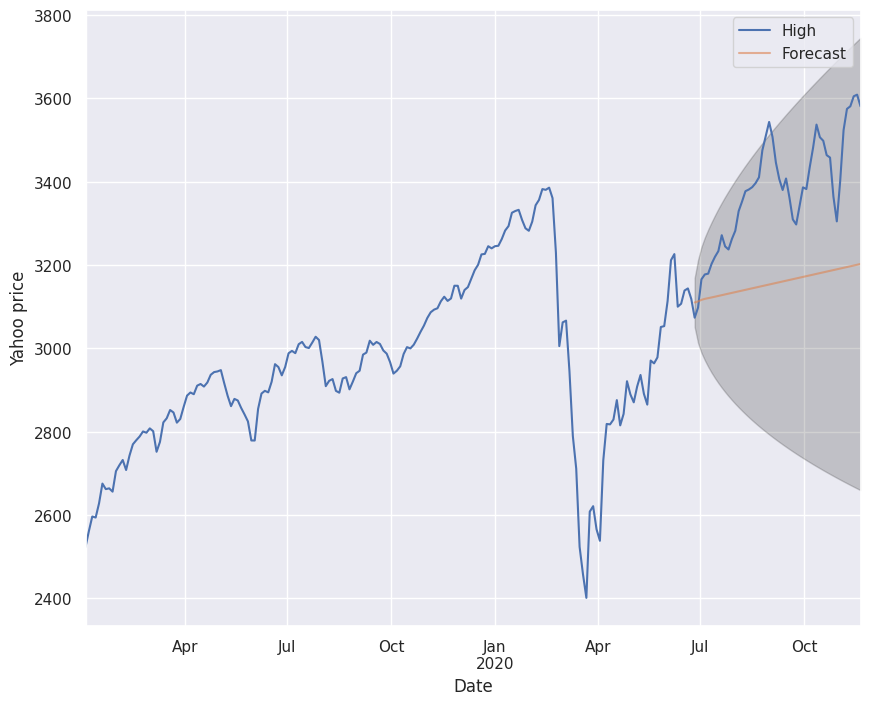

In [ ]:
pred = Yahoo_results.get_prediction(start=pd.to_datetime('2020-06-26'), dynamic=True)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Yahoo price')
plt.legend()

plt.show()